# Pyber Ride Sharing

### Analysis
- Most rides were given in Urban cities, and were also the cheapest on average.
- While to most demand for rides was in Urban cities, the average number of rides given per driver was ~0.6, whereas  Suburban drivers averaged 72% more rides (~1.03) and Rural drivers got twice the amount (~1.2).
- Rural drivers made 2.7 times more on average than urban drivers, and suburban drivers made 2 times urban drivers. 

## Bubble Plot for Ride Sharing Data

In [14]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Set seaborn default color scheme
sns.set()


# Locations for csv files
rideCSV = 'raw_data/ride_data.csv'
cityCSV = 'raw_data/city_data.csv'

# Read csv's into dataframes
rideDF = pd.read_csv(rideCSV)
cityDF = pd.read_csv(cityCSV)

# Group rideDf by city
groupedRidesDF = rideDF.groupby('city')
# Find average fare per city
avgFare = groupedRidesDF['fare'].mean()
# Find total fare per city
totFare = groupedRidesDF['fare'].sum()
# Find total rides per city
totalRides = groupedRidesDF['ride_id'].count()

# Create DataFrame with above information and reset index
groupedRidesDF = pd.DataFrame({'Average Fare':avgFare,
                               'Total Fare':totFare,
                               'Rides': totalRides})
groupedRidesDF = groupedRidesDF.reset_index()

# Merge groupRidesDF with cityDF
mergedDF = pd.merge(groupedRidesDF, cityDF, on='city')
mergedDF = mergedDF.rename(columns={'city':'City',
                                    'driver_count':'Drivers',
                                    'type':'Type'})

mergedDF.head()

,City,Average Fare,Rides,Total Fare,Drivers,Type
0,Alvarezhaven,23.928710,31,741.79,21,Urban
1,Alyssaberg,20.609615,26,535.85,67,Urban
2,Anitamouth,37.315556,9,335.84,16,Suburban
3,Antoniomouth,23.625000,22,519.75,21,Urban
4,Aprilchester,21.981579,19,417.65,49,Urban


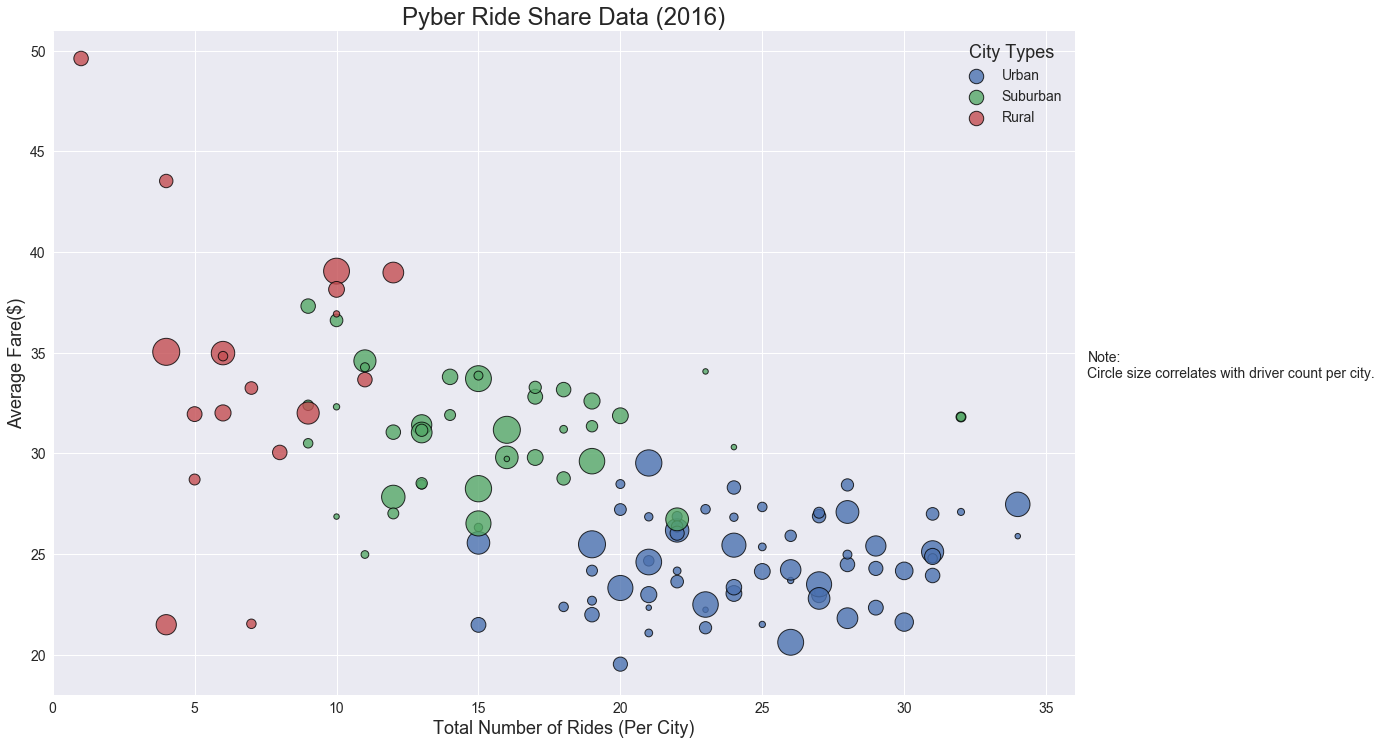

In [1]:
# Create a bubble plot
sns.lmplot(x='Rides', y='Average Fare', data=mergedDF, hue='Type', size=10, aspect=1.5, fit_reg=False, legend=False, scatter_kws={'s': mergedDF['Drivers']*10,'linewidths':1,'edgecolor':'black'})

# Format plot
plt.title('Pyber Ride Share Data (2016)', fontsize=24) #Add title
plt.tick_params(axis='both', labelsize=14) #Format Axis
plt.xlabel('Total Number of Rides (Per City)', fontsize=18) #Create x-axis label
plt.xlim(0,36) #Format x-axis ticks
plt.ylabel('Average Fare($)', fontsize=18) #Create y-axis label
plt.ylim(18,51) #Format y-axis ticks
legend = plt.legend(title='City Types', loc='upper right', markerscale=.75, fontsize=14) #Create legend
legend.get_title().set_fontsize('18') #Set legend title font size
plt.figtext(1,.5,'Note:\nCircle size correlates with driver count per city.',fontsize=14) #Add note

# Show bubble plot
plt.show()

## Total Fares by City Type

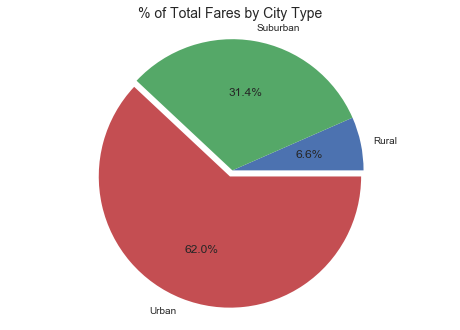

In [7]:
# Group values by type of city
groupedType = mergedDF.groupby('Type')

# Create function to create explode tuple
def createExplodeTuple(inputSeries):
    outputVariable = []
    for i in inputSeries:
        if i == inputSeries.max():
            outputVariable.append(0.05)
        else:
            outputVariable.append(0.0)
    return tuple(outputVariable)


faresByType = groupedType['Total Fare'].sum() #calculate total fares by city type
explode = createExplodeTuple(faresByType) #create explode tuple

# Create dataframe with above data
faresByTypeDF = pd.DataFrame({'Total Fare':faresByType})

# Create Pie Chart
faresByTypeDF.plot.pie(subplots=True, autopct="%1.1f%%", legend=False, explode=explode)

# Format plot
plt.title('% of Total Fares by City Type', fontsize=14) #Add title
plt.ylabel('')
plt.axis("equal")

# Display plot
plt.show()

## Total Rides by City Type

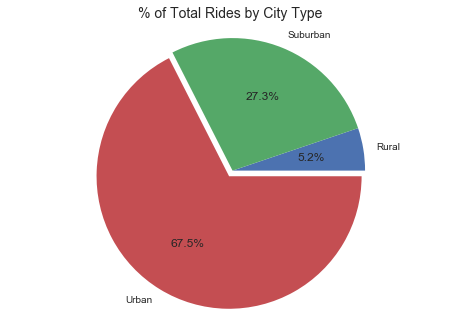

In [9]:
ridesByType = groupedType['Rides'].sum() #calculate total rides by city type
explode = createExplodeTuple(ridesByType) #create explode tuple

# Create dataframe with above data
ridesByTypeDF = pd.DataFrame({'Total Rides':ridesByType})

# Create Pie Chart
ridesByTypeDF.plot.pie(subplots=True, autopct="%1.1f%%", legend=False, explode=explode)

# Format plot
plt.title('% of Total Rides by City Type', fontsize=14) #Add title
plt.ylabel('')
plt.axis("equal")

# Display plot
plt.show()

## Total Drivers by City Type

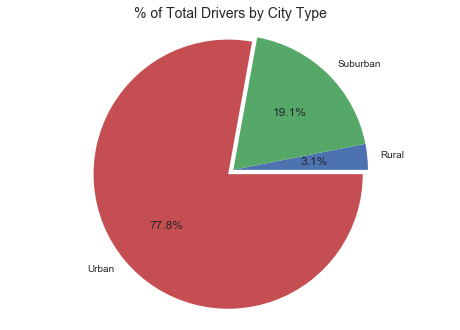

In [22]:
driversByType = groupedType['Drivers'].sum() #calculate total drivers by city type
explode = createExplodeTuple(driversByType) #create explode tuple

# Create dataframe with above data
driversByTypeDF = pd.DataFrame({'Total Drivers':driversByType})

# Create Pie Chart
driversByTypeDF.plot.pie(subplots=True, autopct="%1.1f%%", legend=False, explode=explode)

# Format plot
plt.title('% of Total Drivers by City Type', fontsize=14) #Add title
plt.ylabel('')
plt.axis("equal")

# Display plot
plt.show()